<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Challenge S6: Análisis y visualización de texto

## Objetivo

El objetivo de este challenge es a construir un análisis de opiniones con un dataset que contiene:

* Opiniones con contenido positivo
* Opiniones con contenido negativo

Para ello vamos a utilizar un dataset, o corpus, de texto. Constuiremos nuestro WordCloud con estos datos preprocesando el texto previamente.

## Configuración del entorno

In [639]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus import brown

## Carga de datos

En este caso las reviews etiquetadas se encuentran en un fichero txt (`reviews.txt`) que contiene una línea por cada review y tiene la siguiente estructura `(0|1)<TABULADOR>texto`:

In [778]:
reviews_pos = []
reviews_neg = []

with open('reviews.txt', 'r', encoding='utf-8') as file:
    for line in file:
        trozos = line.split('\t')    
        if trozos[0] == '0':
            # Negativos
            reviews_neg.append(trozos[1].lower())
        elif trozos[0] == '1':
            # Positivos
            reviews_pos.append(trozos[1].lower())

In [4]:
print(reviews_pos[0:5])

['the da vinci code book is just awesome.\n', "this was the first clive cussler i've ever read, but even books like relic, and da vinci code were more plausible than this.\n", 'i liked the da vinci code a lot.\n', 'i liked the da vinci code a lot.\n', "i liked the da vinci code but it ultimatly didn't seem to hold it's own.\n"]


In [5]:
print(reviews_neg[0:5])

['da vinci code was a terrible movie.\n', 'then again, the da vinci code is super shitty movie, and it made like 700 million.\n', 'the da vinci code comes out tomorrow, which sucks.\n', 'i thought the da vinci code movie was really boring.\n', "god, yahoo games has this truly-awful looking da vinci code-themed skin on it's chessboard right now.\n"]


## Limpieza de signos
La primera función a implementar una función que nos filtre las reviews completas sin signos de puntuación:

In [779]:
from nltk.corpus import stopwords

def filtrar_review(review):
    review_limpia = ""
    '''
    Filtra un review devolviendo una review "limpio"
    '''
    separadores = [',', '.\n','.',';', ':','"' ,'?', '¿', '!', '¡','...','..','\n']
    for i in review:
        if i.lower() in separadores:
            pass
        else:
            review_limpia += i
    return review_limpia

In [176]:
reviews_pos_filtradas = [filtrar_review(x) for x in reviews_pos]
print(reviews_pos_filtradas[0:10])

['the da vinci code book is just awesome', "this was the first clive cussler i've ever read but even books like relic and da vinci code were more plausible than this", 'i liked the da vinci code a lot', 'i liked the da vinci code a lot', "i liked the da vinci code but it ultimatly didn't seem to hold it's own", "that's not even an exaggeration ) and at midnight we went to wal-mart to buy the da vinci code which is amazing of course", 'i loved the da vinci code but now i want something better and different', 'i thought da vinci code was great same with kite runner', 'the da vinci code is actually a good movie', 'i thought the da vinci code was a pretty good book']


In [178]:
reviews_neg_filtradas = [filtrar_review(x) for x in reviews_neg]
print(reviews_neg_filtradas[0:10])

['da vinci code was a terrible movie', 'then again the da vinci code is super shitty movie and it made like 700 million', 'the da vinci code comes out tomorrow which sucks', 'i thought the da vinci code movie was really boring', "god yahoo games has this truly-awful looking da vinci code-themed skin on it's chessboard right now", 'da vinci code does suck', 'and better-we all know da vinci code is bogus and inaccurate', 'last time da vinci code is also a bit disappointing to me because many things written in the book is never mentioned in movie', 'and better-we all know da vinci code is bogus and inaccurate', 'and better-we all know da vinci code is bogus and inaccurate']


## Obtención de palabras
El siguiente paso de nuestro pipeline es convertir las reviews en palabras separadas:

In [780]:
def obtener_palabras(review):
    '''
    Realiza la separación en palabras de un review devolviendo una lista de palabras.
    '''
    palabras_review = []
    # IMPLEMENTA AQUÍ TU CÓDIGO
    stp = stopwords.words('english')
    custom_filter = ["#","/","'re","'ve","--","]","+","'d","*","&","‘","'","~","’","n't","'s","(","=","<","thats"]
    reviews = word_tokenize(review)
    for i in reviews:
        if i.lower() in stp:
            pass
        elif i.lower() in custom_filter:
            pass
        else:
            palabras_review.append(i)

    return palabras_review

In [654]:
palabras_positivas = []
for t in reviews_pos_filtradas:
    palabras_positivas.extend(obtener_palabras(t))
    
print("palabras_positivas: " + str(len(palabras_positivas)))
print(palabras_positivas[0:100])

palabras_positivas: 25389
['da', 'vinci', 'code', 'book', 'awesome', 'first', 'clive', 'cussler', 'ever', 'read', 'even', 'books', 'like', 'relic', 'da', 'vinci', 'code', 'plausible', 'liked', 'da', 'vinci', 'code', 'lot', 'liked', 'da', 'vinci', 'code', 'lot', 'liked', 'da', 'vinci', 'code', 'ultimatly', 'seem', 'hold', 'even', 'exaggeration', ')', 'midnight', 'went', 'wal-mart', 'buy', 'da', 'vinci', 'code', 'amazing', 'course', 'loved', 'da', 'vinci', 'code', 'want', 'something', 'better', 'different', 'thought', 'da', 'vinci', 'code', 'great', 'kite', 'runner', 'da', 'vinci', 'code', 'actually', 'good', 'movie', 'thought', 'da', 'vinci', 'code', 'pretty', 'good', 'book', 'da', 'vinci', 'code', 'one', 'beautiful', 'movies', 'ive', 'ever', 'seen', 'da', 'vinci', 'code', 'amazing', 'book', 'get', 'wrong', 'turn', 'light', 'radio', 'enjoy', 'da', 'vinci', 'code', 'da', 'vinci']


In [655]:
palabras_negativas = []
for t in reviews_neg_filtradas:
    palabras_negativas.extend(obtener_palabras(t))
    
print("palabras_negativas: " + str(len(palabras_negativas)))
print(palabras_negativas[0:100])

palabras_negativas: 21768
['da', 'vinci', 'code', 'terrible', 'movie', 'da', 'vinci', 'code', 'super', 'shitty', 'movie', 'made', 'like', '700', 'million', 'da', 'vinci', 'code', 'comes', 'tomorrow', 'sucks', 'thought', 'da', 'vinci', 'code', 'movie', 'really', 'boring', 'god', 'yahoo', 'games', 'truly-awful', 'looking', 'da', 'vinci', 'code-themed', 'skin', 'chessboard', 'right', 'da', 'vinci', 'code', 'suck', 'better-we', 'know', 'da', 'vinci', 'code', 'bogus', 'inaccurate', 'last', 'time', 'da', 'vinci', 'code', 'also', 'bit', 'disappointing', 'many', 'things', 'written', 'book', 'never', 'mentioned', 'movie', 'better-we', 'know', 'da', 'vinci', 'code', 'bogus', 'inaccurate', 'better-we', 'know', 'da', 'vinci', 'code', 'bogus', 'inaccurate', 'better-we', 'know', 'da', 'vinci', 'code', 'bogus', 'inaccurate', 'jesus', 'fabricated', 'la', 'da', 'vinci', 'code', 'christianity', 'worthless', 'think', 'bolsters', 'arguments', 'england', 'da', 'vinci']


## Filtrar palabras
Una vez obtenidas las palabras debemos filtrar todas las palabras que no aporte información relevante al resultado. Acuérdate de filtrar también los signos de puntuación que puedan haber:

In [860]:
def filtrar_palabras(palabras):
    ''' 
    Elimina de la lista de entrada las palabras no deseadas
    Devuelve una lista de palabras filtradas.
    '''
    out = []
    # IMPLEMENTA AQUÍ TU CÓDIGO
    fdist = FreqDist(palabras)
    freq = [(w, n) for w, n in fdist.items() if n > 20 and len(w) > 3]
    out = freq
    return out

In [861]:
palabras_positivas_filtradas = filtrar_palabras(palabras_positivas)

print("palabras_positivas_filtradas: " + str(len(palabras_positivas_filtradas)))
print(palabras_positivas_filtradas[0:100])

palabras_positivas_filtradas: 107
[('vinci', 1000), ('code', 996), ('book', 125), ('awesome', 1124), ('first', 97), ('read', 101), ('books', 22), ('like', 871), ('liked', 99), ('went', 25), ('loved', 256), ('want', 172), ('thought', 88), ('great', 92), ('good', 111), ('movie', 228), ('beautiful', 127), ('movies', 192), ('really', 186), ('love', 1534), ('also', 100), ('would', 172), ('yeah', 86), ('people', 167), ('well', 91), ('excellent', 86), ('reading', 95), ('much', 188), ('side', 83), ('anyone', 81), ('still', 90), ('right', 86), ('wait', 88), ('think', 90), ('things', 84), ('know', 175), ('make', 83), ('absolutely', 93), ('last', 87), ('stand', 81), ('watch', 86), ('series', 177), ('worth', 82), ('wanted', 81), ('desperately', 80), ("love'the", 80), ('film', 89), ('lubb', 80), ('mission', 997), ('impossible', 998), ('rocks', 85), ('going', 86), ('story', 166), ('turned', 81), ('said', 82), ('friends', 84), ('either', 81), ('care', 81), ('never', 84), ('freakin', 81), ('hoot', 80)

In [862]:
palabras_negativas_filtradas = filtrar_palabras(palabras_negativas)

print("palabras_negativas_filtradas: " + str(len(palabras_negativas_filtradas)))
print(palabras_negativas_filtradas[0:100])

palabras_negativas_filtradas: 98
[('vinci', 1001), ('code', 998), ('terrible', 174), ('movie', 555), ('like', 23), ('sucks', 601), ('really', 188), ('boring', 92), ('right', 163), ('suck', 276), ('know', 101), ('time', 93), ('think', 112), ('hate', 571), ('evil', 30), ('sucked', 594), ('fucking', 169), ('hated', 38), ('ever', 89), ('much', 264), ('cool', 82), ('heard', 95), ('stupid', 365), ('went', 90), ('seen', 89), ('friday', 82), ('person', 85), ('watching', 83), ('around', 83), ('knows', 82), ('hates', 82), ('reading', 84), ('review', 82), ('hung', 80), ('kelsie', 80), ('combining', 80), ('opinion', 82), ('gary', 80), ('left', 161), ('letting', 80), ('stars', 80), ('mission', 93), ('impossible', 93), ('movies', 174), ('making', 84), ('horrible', 181), ('harry', 1003), ('potter', 1007), ('depressing', 188), ('past', 81), ('cock', 85), ('needs', 81), ('character', 81), ('better', 82), ('quiz', 80), ('retarted', 80), ('black', 80), ('always', 81), ('want', 82), ('crazy', 80), ('outsh

## Wordclouds

Vamos a dar un primer vistazo a los resultados. Construye un wordcloud para sentimiento positivo, uno para sentimiento negativo y otro que combine ambos tipos de palabras. 

Recuerda que wordcloud espera que le pases las palabras separadas por espacios en una misma cadena. Para ello, ayúdate de `join`: `palabras_positivas_juntas = ' '.join(palabras_positivas)`

### Wordcloud de sentimientos positivos

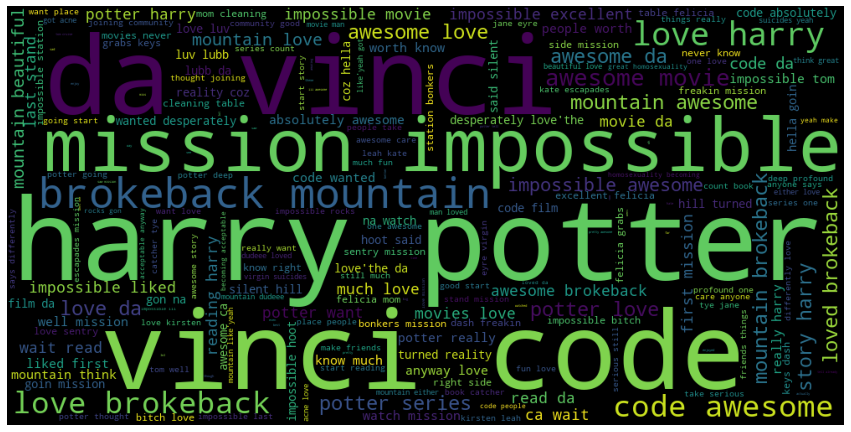

In [863]:
# IMPLEMENTA AQUÍ TU CÓDIGO
palabras_positivas_join = ' '.join(palabras_positivas)
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(palabras_positivas_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud de sentimientos negativos

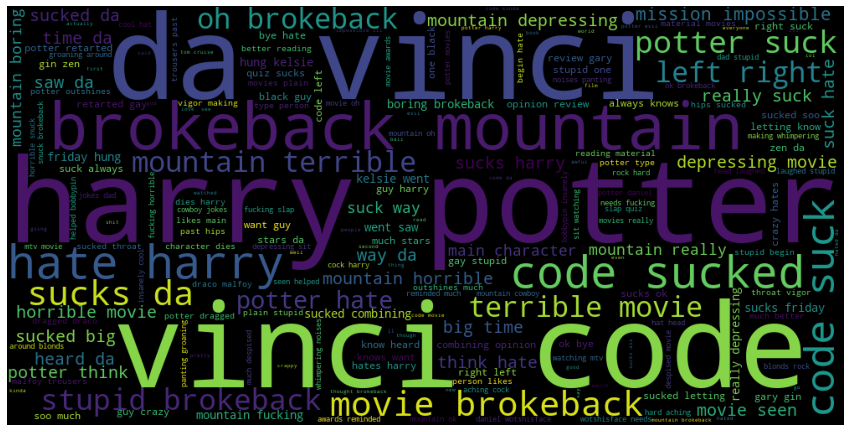

In [864]:
# IMPLEMENTA AQUÍ TU CÓDIGO
palabras_negativas_join = ' '.join(palabras_negativas)
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(palabras_negativas_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud de ambos sentimientos

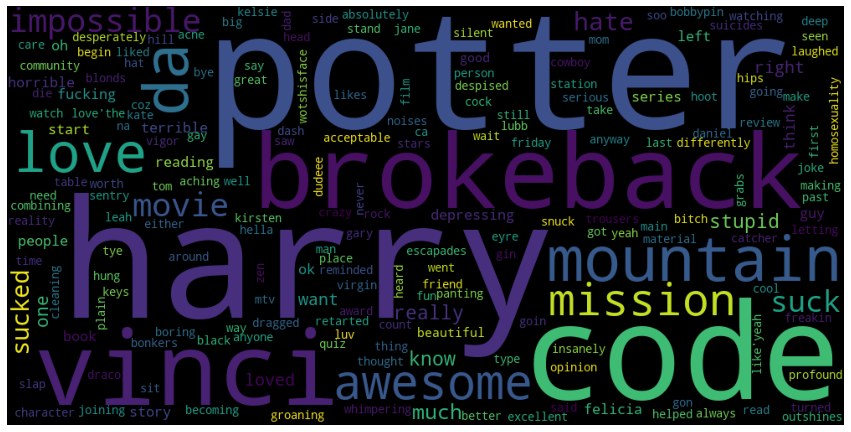

In [857]:
import random
# IMPLEMENTA AQUÍ TU CÓDIGO
type(palabras_negativas_join)

# IMPLEMENTA AQUÍ TU CÓDIGO

# juntamos positivas y negativas
palabras_pos = ' '.join(palabras_positivas)
palabras_todas = palabras_pos + ' '.join(palabras_negativas)

# Convertimos en lista para poder randomizar el orden de la lista
lista = palabras_todas.split(" ")
random.shuffle(lista)
palabras_todas_final = ' '.join(lista)

# mostramos el wordclous
wordcloud_todas = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(palabras_todas_final)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_todas)
plt.axis("off")
plt.show()

* ¿Qué te parecen los resultados?

  Hemos hecho bastante limpieza con respecto al texto original, en el wordcloud las mas repetidas aparecen con un tamano mayor. Sin embargo aqui estamos buscando reviews con contenido positivo y negativo y no necesariamente son las que mas aparecen. 
  
* ¿Qué crees que se podría mejorar?

  Por ejemplo usando categorias lexicas (identificando nombres,verbos,adjetivos, etc ...)

## Análisis de frecuencias de reviews negativos y positivos
A partir de las palabras filtradas queremos el conjunto de palabras que nos muestre cuales son las palabras más probables en cada categoría (reviews positivo o negativo).

In [903]:
def calcula_palabras_mas_probables(palabras, n):
    '''
    Devuelve un conjunto con las n palabras más probables
    '''
    conjunto = set()
    conjunto = sorted(palabras, key=lambda x: x[1],reverse=True)
    return conjunto

In [905]:
conjunto_positivas = calcula_palabras_mas_probables(palabras_positivas_filtradas, 500)  
print("conjunto_positivas: " + str(len(conjunto_positivas)))
print(conjunto_positivas)

conjunto_positivas: 107
[('love', 1534), ('awesome', 1124), ('potter', 1086), ('harry', 1085), ('vinci', 1000), ('brokeback', 999), ('impossible', 998), ('mission', 997), ('code', 996), ('mountain', 994), ('like', 871), ('loved', 256), ('movie', 228), ('movies', 192), ('much', 188), ('really', 186), ('series', 177), ('know', 175), ('want', 172), ('would', 172), ('people', 167), ('story', 166), ('start', 161), ('felicia', 160), ('beautiful', 127), ('book', 125), ('good', 111), ('read', 101), ('also', 100), ('liked', 99), ('first', 97), ('reading', 95), ('absolutely', 93), ('great', 92), ('well', 91), ('still', 90), ('think', 90), ('film', 89), ('thought', 88), ('wait', 88), ('last', 87), ('yeah', 86), ('excellent', 86), ('right', 86), ('watch', 86), ('going', 86), ('rocks', 85), ('things', 84), ('friends', 84), ('never', 84), ('side', 83), ('make', 83), ('worth', 82), ('said', 82), ('community', 82), ('place', 82), ('anyway', 82), ('anyone', 81), ('stand', 81), ('wanted', 81), ('turned'

In [906]:
conjunto_negativas = calcula_palabras_mas_probables(palabras_negativas_filtradas, 500)    
print("conjunto_negativas: " + str(len(conjunto_negativas)))
print(conjunto_negativas)

conjunto_negativas: 98
[('potter', 1007), ('harry', 1003), ('vinci', 1001), ('mountain', 1000), ('code', 998), ('brokeback', 997), ('sucks', 601), ('sucked', 594), ('hate', 571), ('movie', 555), ('stupid', 365), ('suck', 276), ('much', 264), ('really', 188), ('depressing', 188), ('horrible', 181), ('terrible', 174), ('movies', 174), ('fucking', 169), ('right', 163), ('left', 161), ('think', 112), ('know', 101), ('heard', 95), ('time', 93), ('mission', 93), ('impossible', 93), ('boring', 92), ('went', 90), ('ever', 89), ('seen', 89), ('person', 85), ('cock', 85), ('reading', 84), ('making', 84), ('watching', 83), ('around', 83), ('cool', 82), ('friday', 82), ('knows', 82), ('hates', 82), ('review', 82), ('opinion', 82), ('better', 82), ('want', 82), ('past', 81), ('needs', 81), ('character', 81), ('always', 81), ('main', 81), ('head', 81), ('jokes', 81), ('hung', 80), ('kelsie', 80), ('combining', 80), ('gary', 80), ('letting', 80), ('stars', 80), ('quiz', 80), ('retarted', 80), ('black

### ¿Se te ocurre cómo mejorarlo?
Como ves existen muchas palabras parecidas, o directamente las mismas, ¿se te ocurre cómo podríamos mejorarlo?. Por ejemplo, podríamos eliminar esas palabras comunes de ambos conjuntos, ya que no aportan nada.

In [909]:

comunes = {} # IMPLEMENTA AQUÍ TU CÓDIGO
joinedlist = conjunto_positivas + conjunto_negativas
visto = set() 

comunes = [(a, b) for a, b in joinedlist 
         if (a in visto or visto.add(a))] 
comunes

[('potter', 1007),
 ('harry', 1003),
 ('vinci', 1001),
 ('mountain', 1000),
 ('code', 998),
 ('brokeback', 997),
 ('movie', 555),
 ('much', 264),
 ('really', 188),
 ('movies', 174),
 ('right', 163),
 ('think', 112),
 ('know', 101),
 ('mission', 93),
 ('impossible', 93),
 ('went', 90),
 ('reading', 84),
 ('want', 82),
 ('like', 23)]

Una vez tenemos las palabras comunes, podemos aplicarlo a los conjuntos tal y como hemos hecho con el resto de transformaciones.

In [836]:
def quitar_comunes(words, comunes):
    out = []

    # IMPLEMENTA AQUÍ TU CÓDIGO

    # Nos quedamos con el primer elemento de la tupla
    palabras = [i[0] for i in words]
    p_comunes = [j[0] for j in comunes]
    
    # convertimos a set 
    palabras_set = set(palabras)
    p_comunes_set = set(p_comunes)
    
    # Eliminamos las comunes
    out_tmp = list(set(palabras_set)^set(p_comunes_set))
    # tageamos para filtrar mas certeramente // https://www.nltk.org/book/ch05.html --> Se pueden hacer muchas mas cosas, aqui hago algo simple,
    # me quedo solo con los adjetivos.
    palabras_set_tag = nltk.pos_tag(out_tmp)
    #print (palabras_set_tag)
    out = [ii[0] for ii in palabras_set_tag if ii[1] == 'JJ']
    return out

In [837]:
conjunto_positivas_filtradas = quitar_comunes(conjunto_positivas, comunes)
print("conjunto_positivas_filtradas: ", str(conjunto_positivas_filtradas))

conjunto_positivas_filtradas:  ['serious', 'station', 'table', "like'yeah", 'kate', 'deep', 'acne', 'first', 'thought', 'last', 'beautiful', 'awesome', 'acceptable', 'great', 'felicia', 'silent', 'good']


In [833]:
conjunto_negativas_filtradas = quitar_comunes(conjunto_negativas, comunes)
print("conjunto_negativas_filtradas: ", str(conjunto_negativas_filtradas))

conjunto_negativas_filtradas:  ['black', 'cool', 'stupid', 'cowboy', 'crazy', 'horrible', 'friday', 'terrible', 'laughed', 'type', 'gary', 'rock-hard', 'main', 'likes']


###  Punto extra: histogramas

Construye histogramas para cada uno de los casos anteriores y compara si tiene sentido lo que se muestra.

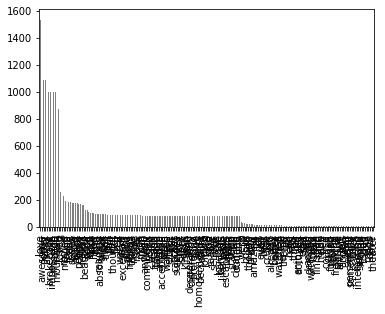

In [788]:
# IMPLEMENTA AQUÍ TU CÓDIGO
pd.Series(palabras_positivas).value_counts()[:200].plot(kind="bar", color = "gray")

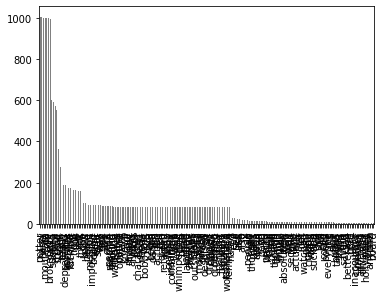

In [789]:
pd.Series(palabras_negativas).value_counts()[:200].plot(kind="bar", color = "gray")

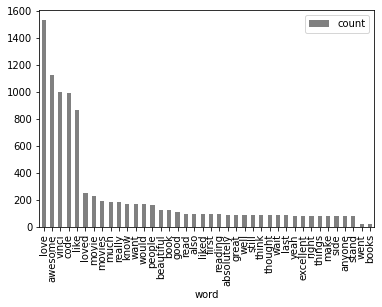

In [795]:
freq_pos = pd.DataFrame(palabras_positivas_filtradas[:40]).rename(columns = {0 : "word", 1 : "count"})
freq_pos.sort_values(by = "count", ascending = False).plot(x = "word", y = "count", kind="bar", color = "gray")

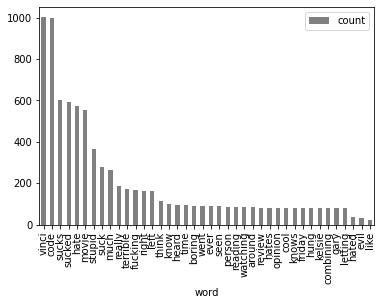

In [796]:
freq_neg = pd.DataFrame(palabras_negativas_filtradas[:40]).rename(columns = {0 : "word", 1 : "count"})
freq_neg.sort_values(by = "count", ascending = False).plot(x = "word", y = "count", kind="bar", color = "gray")

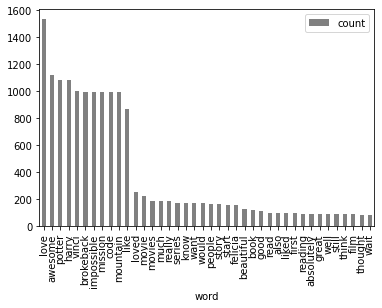

In [907]:
conj_pos = pd.DataFrame(conjunto_positivas[:40]).rename(columns = {0 : "word", 1 : "count"})
conj_pos.sort_values(by = "count", ascending = False).plot(x = "word", y = "count", kind="bar", color = "gray")

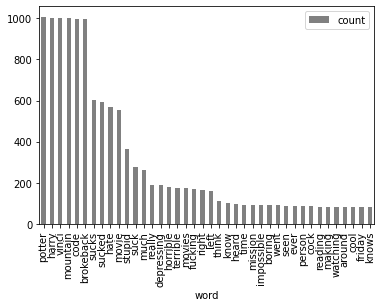

In [908]:
conj_neg = pd.DataFrame(conjunto_negativas[:40]).rename(columns = {0 : "word", 1 : "count"})
conj_neg.sort_values(by = "count", ascending = False).plot(x = "word", y = "count", kind="bar", color = "gray")

## Conclusiones

* ¿Qué otras técnicas habrías aplicado?
  
  Lo que he podido ver de taggear me parece interesante de cara a poder afinar mejor lo que es y no es positivo/ negativo

* ¿Cuál crees que sería el siguiente paso?
  
  Un poco en esa linea , aplicar tecnicas un poco mas avanzadas de cara a la categorizacion del texto de modo preciso para la tematica que se vaya a
  trabajar.